<a href="https://colab.research.google.com/github/ashikshafi08/2015-Traffic-Fatalities/blob/main/Projects/Detect_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install fastai

In [ ]:
!pip install fastbook

In [ ]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

# New Data 

* Collected more data 
* More than 4k images has been added. 
* Research paper dataset - 1125
* New data - 6025

In [ ]:
path_train = Path('/content/gdrive/My Drive/Data/train')

# Getting file names 
fns_train = get_image_files(path_train)
fns_train




(#5142) [Path('/content/gdrive/My Drive/Data/train/NORMAL/NORMAL(1223).jpg'),Path('/content/gdrive/My Drive/Data/train/NORMAL/NORMAL(1233).jpg'),Path('/content/gdrive/My Drive/Data/train/NORMAL/NORMAL(1221).jpg'),Path('/content/gdrive/My Drive/Data/train/NORMAL/NORMAL(1226).jpg'),Path('/content/gdrive/My Drive/Data/train/NORMAL/NORMAL(1238).jpg'),Path('/content/gdrive/My Drive/Data/train/NORMAL/NORMAL(1239).jpg'),Path('/content/gdrive/My Drive/Data/train/NORMAL/NORMAL(1253).jpg'),Path('/content/gdrive/My Drive/Data/train/NORMAL/NORMAL(128).jpg'),Path('/content/gdrive/My Drive/Data/train/NORMAL/NORMAL(1244).jpg'),Path('/content/gdrive/My Drive/Data/train/NORMAL/NORMAL(1256).jpg')...]

## Building a DataBlock

In [ ]:
kag_covid = DataBlock( 
    blocks = (ImageBlock , CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2 , seed=42), 
    get_y = parent_label,
    item_tfms = Resize(224),
    batch_tfms=aug_transforms(mult=2)
)

In [ ]:
# Creating a dataloaders 

kag_dls = kag_covid.dataloaders(path_train , bs=12)



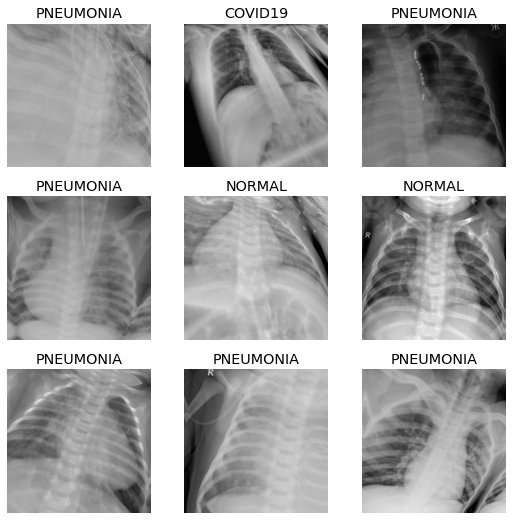

In [ ]:
# Visualizing train and valid 

kag_dls.train.show_batch()

In [ ]:
# Some Performance metrics 

f1_score = F1Score(average = 'macro')
precision = Precision(average= 'macro')
recall = Recall(average = 'macro') # Sensitivity 

In [ ]:
learn = cnn_learner(kag_dls , resnet18 , metrics = [error_rate , accuracy , f1_score , precision , recall ])
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
# Saving the model 

learn.export() 

path = Path() 
path.ls(file_exts = '.pkl')




(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner('/content/export.pkl')

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/Data/test/COVID19/COVID19(463).jpg')

('COVID19', TensorImage(0), TensorImage([0.9972, 0.0018, 0.0010]))

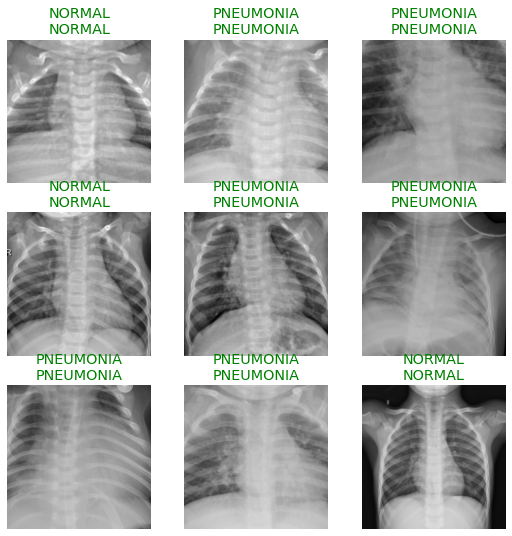

In [ ]:
learn.show_results()

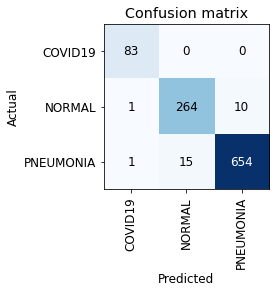

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

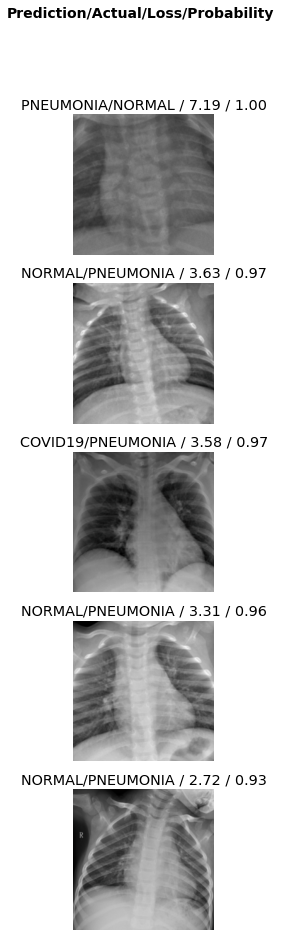

In [ ]:
# Where the model got confuse and went wrong 

interp.plot_top_losses(5 , nrows=5) #  3 places where the model got confused 

In [ ]:
plot_top_losses?

## Creating a working prototype in Notebook

In [ ]:
# Creating a button 

btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

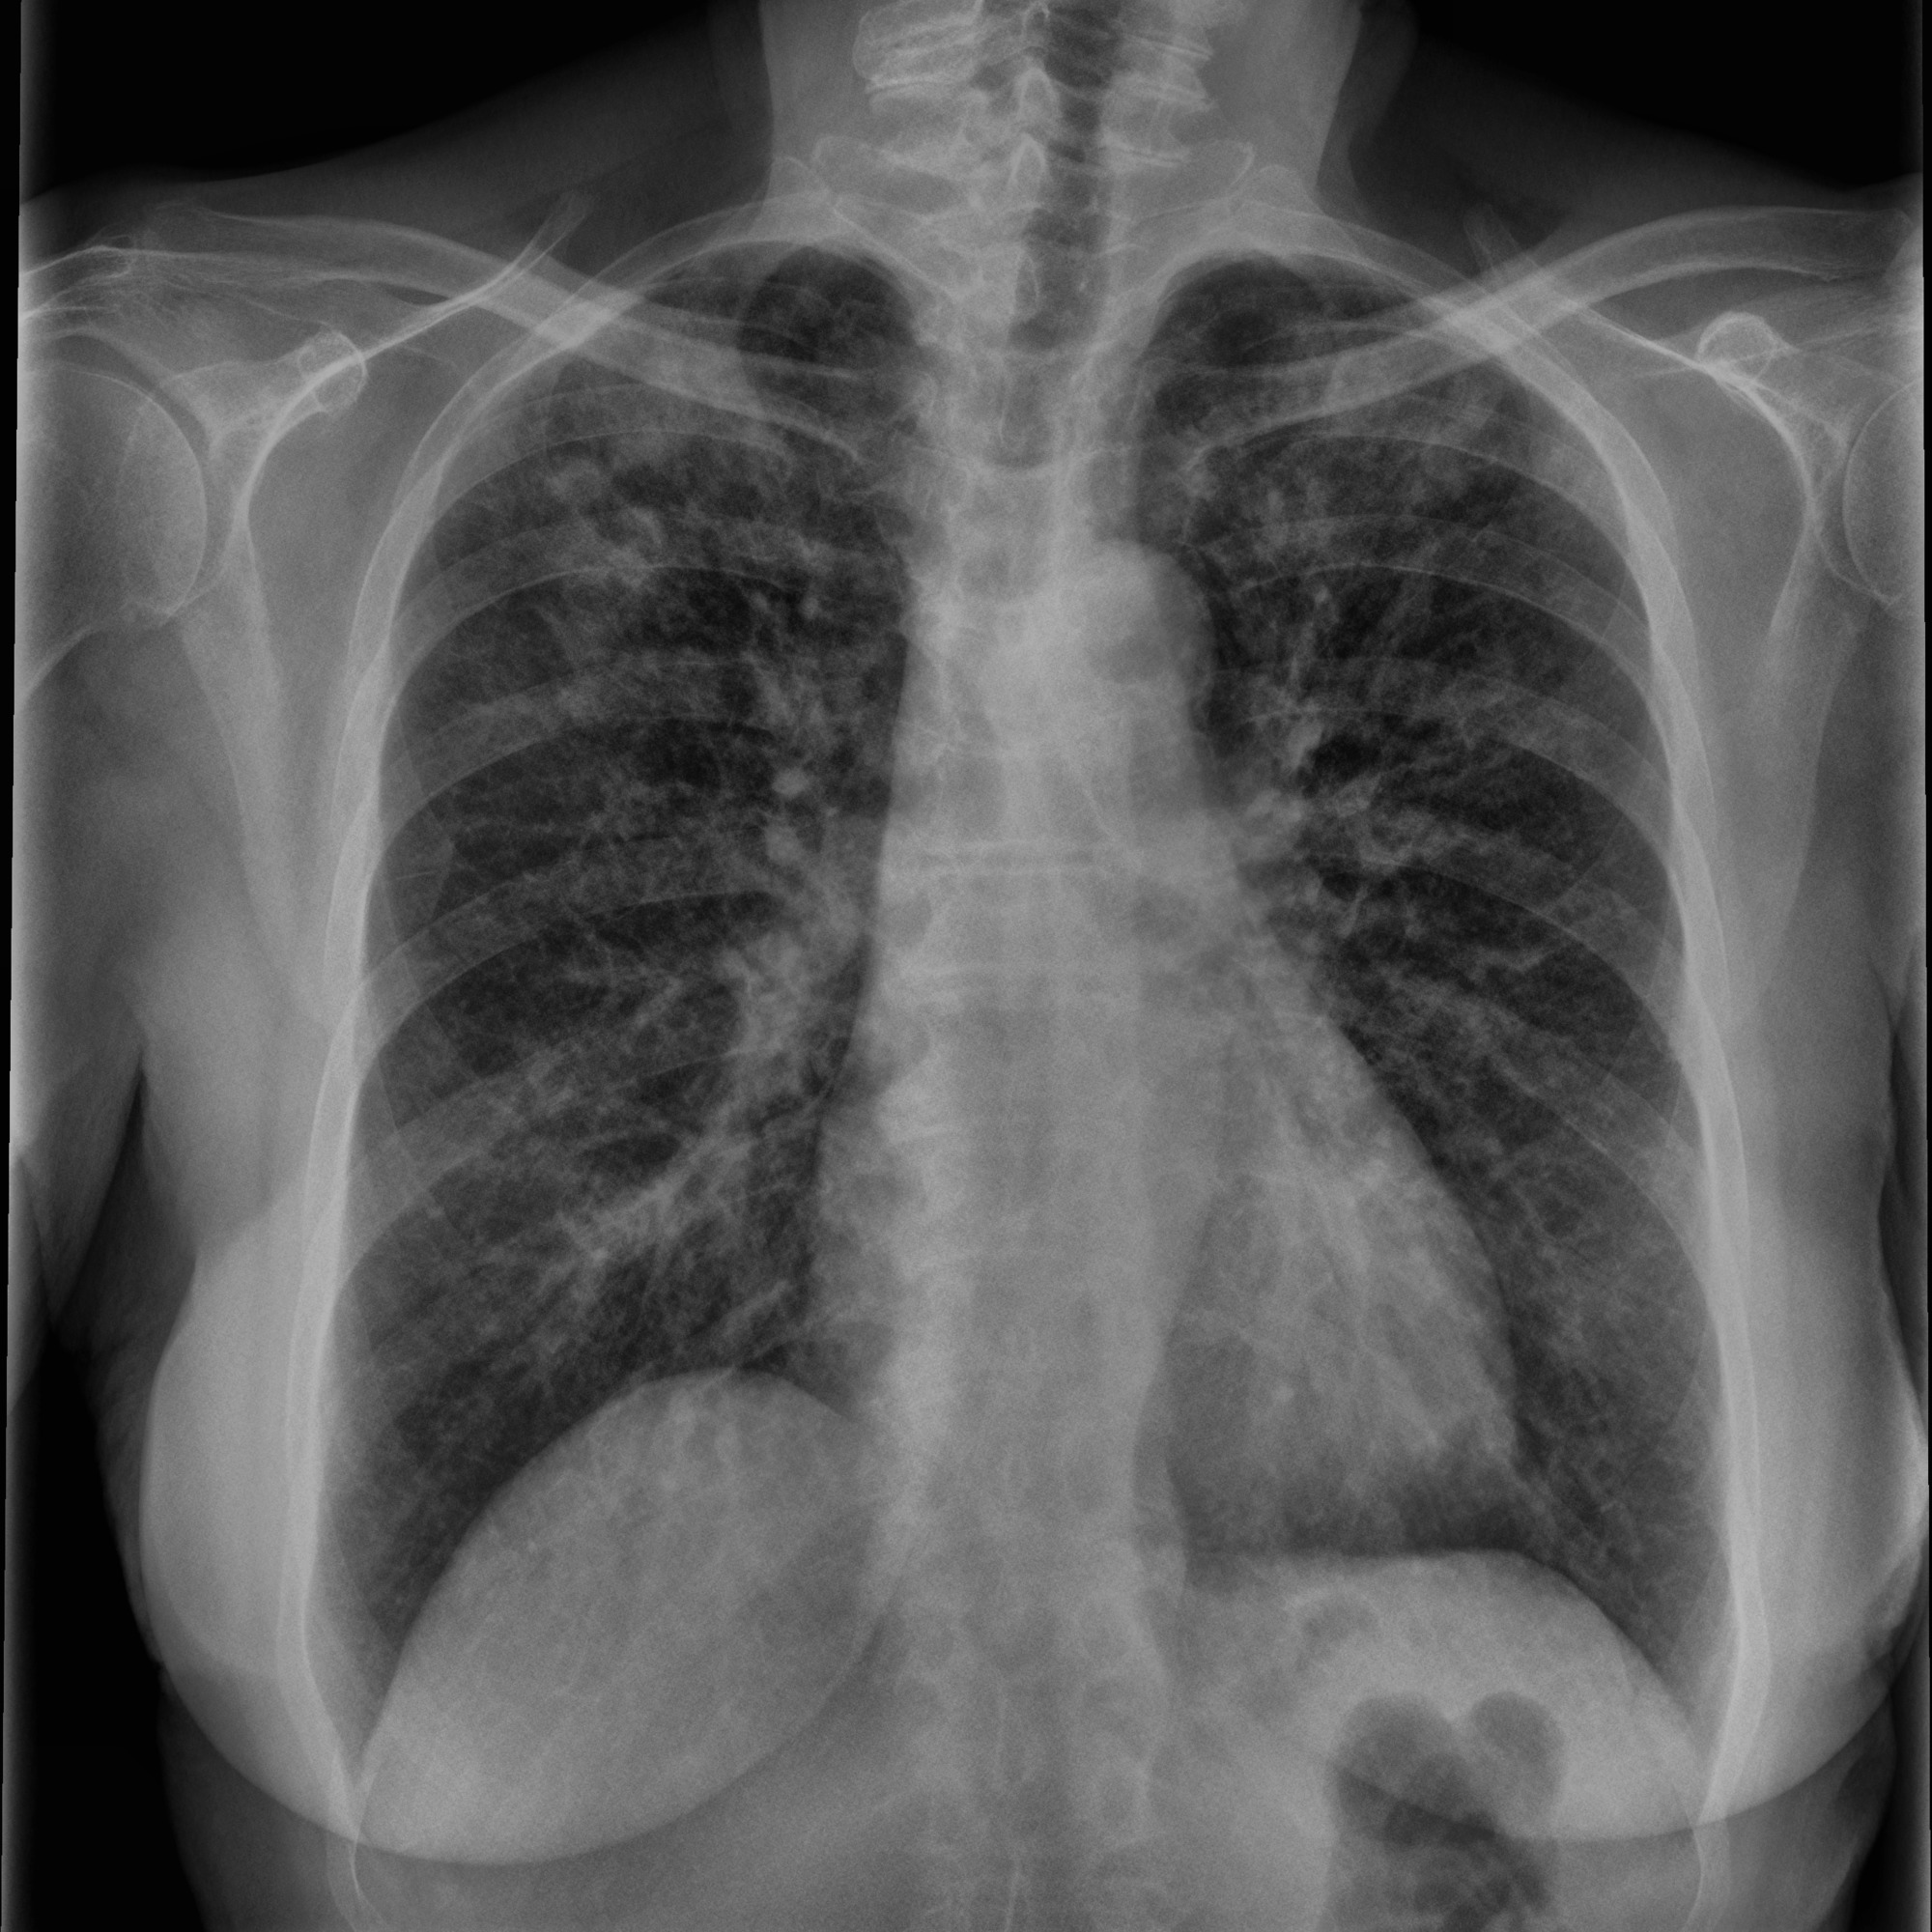

In [ ]:
# Converting the image into pillow format 

img = PILImage.create(btn_upload.data[-1])
img

In [ ]:
# Getting our predictions 


pred , pred_idx , prob = learn_inf.predict(img)

print('Prediction :' , pred)
print('Prediction index (tensor) :' , pred_idx)
print('Probability : ', prob) 

Prediction : COVID19
Prediction index (tensor) : TensorImage(0)
Probability :  TensorImage([0.9972, 0.0018, 0.0010])


In [ ]:
# Creating a classify button 

btn_clf = widgets.Button(description = 'Classify')
btn_clf

Button(description='Classify', style=ButtonStyle())

In [ ]:
# Prediction Label 

lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction : {pred}; Probability : {prob[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction : COVID19; Probability : 0.9972')

In [ ]:
# Output widget for displaying 

out_pl = widgets.Output()
out_pl.clear_output() 

with out_pl: 
  display(img.to_thumb(128 , 128))

out_pl

Output()

In [ ]:
# Putting everything into a function for event handler 

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {prob[pred_idx]:.03f}'

btn_clf.on_click(on_click_classify)

In [ ]:
# Creating a VBOX 

VBox([widgets.Label('Select your X-ray to be classified!') , btn_upload , btn_clf , out_pl , lbl_pred])